In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import xarray as xr
import cartopy.crs as ccrs

In [2]:
#netcdf data

ds = xr.open_dataset('GEOS-CF_AirQuality_20180101_0030z.nc4')

In [3]:
ds

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, lev: 1, time: 1)
Coordinates:
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev            (lev) float64 72.0
  * time           (time) datetime64[ns] 2018-01-01T00:30:00
Data variables:
    CO             (time, lev, lat, lon) float32 ...
    NO2            (time, lev, lat, lon) float32 ...
    O3             (time, lev, lat, lon) float32 ...
    PM25_RH35_GCC  (time, lev, lat, lon) float32 ...
    SO2            (time, lev, lat, lon) float32 ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Mon Dec 24 13:37:28 2018 GMT
    Source:                cak_Icarus-1_0_GCCv12-00-01_v1_010 experiment_id: ...
    Conventions:           CF-1
    Title:                 GEOS CF (Composition Forecast)
    Institution:           NASA Global Modeling and Assimilation Office
    ...                    ...
    DataResolution:        0.25 x 0.25
    LongName:              GEOS CF 2d time-averaged air quality concentration...
    ShortName:             CF01Raqc_1hrT_g1440x721_V1
    Comment:               GMAO filename: c360_GEOS-CF.chm_tavg_1hr_g1440x721...
    Filename:              GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...
    GranuleID:             GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...

In [4]:
O3 = ds.O3

In [33]:
latitude = O3['lat']
longitude = O3['lon']

In [29]:
lat

<xarray.DataArray 'lat' (lat: 721)>
array([-90.  , -89.75, -89.5 , ...,  89.5 ,  89.75,  90.  ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [30]:
lon

<xarray.DataArray 'lon' (lon: 1440)>
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
Attributes:
    long_name:  longitude
    units:      degrees_east

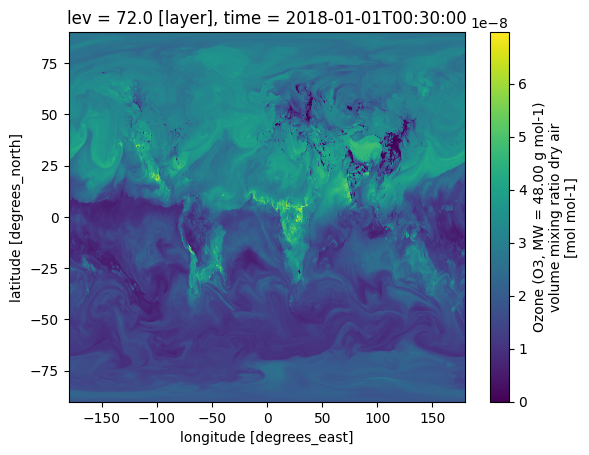

In [5]:
O3.plot()

In [10]:
O3 = ds.O3 * 1e6 # convert from mol/mol (in the xarray description it tells you which units its in) to ppm

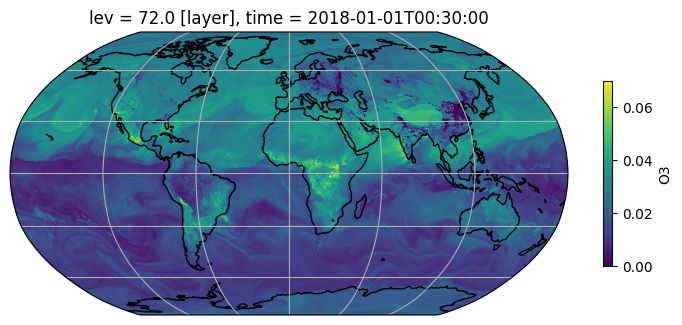

In [11]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
O3ppm.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.4}) # This line just makes the axis smaller
ax.coastlines()
ax.gridlines()

In [12]:
# Ozone is qualitatively high generally in the northern hemisphere and closer to the equator. 
# More specifically in Southern California, Central America, along the Western coast of Latin America sort of between Chile and Peru,
# in Africa along Ivory Coast and Ghana down through the central southern part of the continent, and then off the western coast
# of India there also seems to be a hot spot. 

In [43]:
max = O3.max()
print(max)

<xarray.DataArray 'O3' ()>
array(0.06973278, dtype=float32)


In [57]:
O3.where(O3==max, drop=True)

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[0.06973278]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -118.8
  * lat      (lat) float64 34.5
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [45]:
# O3 is highest at (34.5, -118.8)

In [56]:
O3.where(O3==0, drop=True)

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 4, lon: 8)>
array([[[[nan, nan, nan, nan, nan,  0.,  0., nan],
         [nan, nan, nan, nan, nan, nan,  0.,  0.],
         [ 0., nan,  0.,  0.,  0., nan, nan, nan],
         [nan,  0.,  0.,  0.,  0., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [58]:
# O3 is qualitatively lowest in the southern hemisphere in the middle of large bodies of water, 
# as well as the eastern coast of Asia, and the around Bolivia and Peru in Latin America

In [59]:
# The lats and lons for the lowest O3, which is just zero, are:
# latitudes: 53.0, 53.25, 55.75, and 56.0
# longitudes: 38.5, 38.75, 39.0, 39.25, 39.5, 73.25, 73.5, 73.75

In [67]:
# los angeles ozone

O3.sel(lat=[34.0549], lon=[118.2426], method="nearest")

# the ozone over LA is 0.00054479

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[0.00054479]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 118.2
  * lat      (lat) float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [68]:
# hawaii ozone

O3.sel(lat=[19.8987], lon=[155.6659], method="nearest")

# the ozone over hawaii is 0.02459274

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[0.02459274]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 155.8
  * lat      (lat) float64 20.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

# answers all in one place

In [69]:
# Ozone is qualitatively high generally in the northern hemisphere and closer to the equator. 
# More specifically in Southern California, Central America, along the Western coast of Latin America sort of between Chile and Peru,
# in Africa along Ivory Coast and Ghana down through the central southern part of the continent, and then off the western coast
# of India there also seems to be a hot spot. 


# O3 is highest at (34.5, -118.8)


# O3 is qualitatively lowest in the southern hemisphere in the middle of large bodies of water, 
# as well as the eastern coast of Asia, and the around Bolivia and Peru in Latin America


# The lats and lons for the lowest O3, which is just zero, are:
# latitudes: 53.0, 53.25, 55.75, and 56.0
# longitudes: 38.5, 38.75, 39.0, 39.25, 39.5, 73.25, 73.5, 73.75


# the ozone over LA is 0.00054479


# the ozone over hawaii is 0.02459274